In [7]:
import pandas as pd
from gifter.modeling.tokenizer import lemmatize
from gifter.modeling.data import lemmatized_frame
%matplotlib inline

In [8]:
df = lemmatized_frame()
pd.set_option('display.max_colwidth', 300)

In [9]:
def categories_size(multicategories, frame):
    for key, category in multicategories.iteritems():
        frame[key] = df['lemmas'].apply(
            lambda tweet: any(
                word in tweet for word in category
            )
        )
        text_series = frame[frame[key] == True]['text']
        if not text_series.empty:
            print 'Tweet text from category ' + key + ' : '
            print text_series
    counts = pd.melt(frame[multicategories.keys()]).groupby('variable').sum()
    counts.sort('value', inplace = True)
    counts.plot(kind = 'bar')   

In [10]:
ebay_categories = {
    "motor": lemmatize("motor car truck"),
    "fashion": lemmatize("fashion jawelry"),
    "electronic": lemmatize("electronic camera photo"),
    "art": lemmatize("art collectible"),
    "sport": lemmatize("sport fitness excercise run")
}

NameError: name 'lemmatize' is not defined

In [10]:
compare_with_mati = {
    "obama": lemmatize("obama"),
    "raise": lemmatize("raise"),
    "president": lemmatize("president"),
    "health": lemmatize("health")
}

Tweet text from category sport : 
1547    LIVE: The President is speaking at the White House Healthy Kids and Safe Sports Concussion Summit. http://t.co/Brq2csjA5U #HeadsUp4Safety
Name: text, dtype: object
Tweet text from category electronic : 
14                                   Check out these great photos from this year's #EasterEggRoll: http://t.co/IAksXloAMV #TBT http://t.co/0jfTpkAHxQ
2043                                    Tomorrow, share your own #TBT "life happens" photos—and tell people to #GetCoveredNow. http://t.co/1GUKt5W6MU
2854                                        Check out this historical photo album of Hanukkah celebrations at the White House: http://t.co/zFMeYztin6
4       RT @WhiteHouse: Why are there so many photos about rainbows?\n@PeteSouza takes you behind the lens → https://t.co/10jcsv3ZlQ http://t.co/5wX…
Name: text, dtype: object
Tweet text from category motor : 
1006    RT @WhiteHouse: Then and now: Auto workers are assembling nearly 800,000 more cars each

/Users/nozdi/.virtualenvs/gifter/lib/python2.7/site-packages/pandas/core/frame.py:1815: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


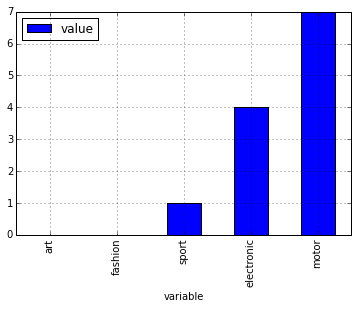

In [11]:
categories_size(
    ebay_categories,
    df
)

Tweet text from category president : 
100                                    "Since I took office, we've cut our deficits as a share of our economy by about two-thirds." —President Obama
101                                              "More than 16 million Americans have gained the security of health care coverage." —President Obama
1015                                     LIVE: President Obama is in Milwaukee speaking at Laborfest 2014. Tune in: http://t.co/v1aFGrFKOR #LaborDay
1017                                          President Obama: It's time to raise the minimum wage. Watch the weekly address: http://t.co/MFIrLJaVTX
1018                 "In America, no one who works full-time should ever have to raise a family in poverty." —President Obama http://t.co/lfI1gzaeU3
102                                                          "The typical family this year should save more than $700 at the pump." —President Obama
1022                                                  Happening now:

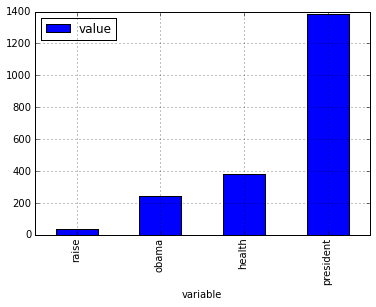

In [7]:
categories_size(
    compare_with_mati,
    df
)